# Homework 3
# Análisis exploratorio de datos
# Santiago Ruiz Piedrahita
# Ejercicio I:

In [295]:
# Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

Imagine que una nueva compañía de automóviles quiere producir su primer automóvil, es importante que el carro sea ecológico y económico, pero también fuerte y cómodo. La compañía quiere predecir qué emisión de CO2 y consumo de combustible pueden esperarse para un automóvil con un tamaño de motor dado, número de cilindros, transmisión, entre otros parámetros.

Antes de aplicar la regresión, los gerentes quieren ver el informe sobre los datos que se utilizarán para entrenar el algoritmo de aprendizaje automático; además, quieren saber qué tecnología utilizar (americana, europea o asiática). 

Recuerde, ¡el elemento más importante de la ciencia de datos es... PENSAR! 

Este ejercicio debe permitirle sentirse cómodo con la herramienta de manipulación de datos: Pandas. Luego PIENSE, qué otra información sería interesante extraer del conjunto de datos, qué otros datos desea tener para que el análisis sea más completo.

* https://raw.githubusercontent.com/mhemmg/datasets/master/car_emission/cars_CO2_emissions_D.csv - contiene las marcas y parámetros del automóvil.
* https://raw.githubusercontent.com/mhemmg/datasets/master/car_emission/car_brands_countries.csv - contiene las marcas de automóviles y el coutry (continente) de origen.

#### Detalles del conjunto de datos

Este conjunto de datos captura los detalles de cómo las emisiones de CO2 de un vehículo pueden variar con las diferentes características. El conjunto de datos se tomó del sitio web oficial de datos abiertos del gobierno de Canadá, esta es una versión compilada y contiene datos de un período de 7 años.

Hay un total de 7385 filas y 12 columnas, además se han utilizado pocas abreviaturas para describir las características. A continuación se enumeran; no obstante, la misma información se encuentra en la hoja de Descripción de Datos.

```

1. Model :
4WD/4X4 = Four-wheel drive
AWD = All-wheel drive
FFV = Flexible-fuel vehicle
SWB = Short wheelbase
LWB = Long wheelbase
EWB = Extended wheelbase

2. Transmission :
A = automatic
AM = automated manual
AS = automatic with select shift
AV = continuously variable
M = manual
3-10 = number of gears

3. Fuel type :
X = regular gasoline
Z = premium gasoline
D = diesel
E = ethanol (E85)
N = natural gas

4. Fuel consumption :
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

5. Estimated tailpipe carbon dioxide emission in grams/km
```

Los datos han sido tomados y compilados de este enlace oficial del Gobierno de Canadá:
https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6

## 1. Carga y limpieza de los datos

a) Complete el conjunto de datos de la emisión de CO2 del automóvil con los datos sobre el origen de las marcas.

b) Del conjunto de datos dado imprima las primeras y las últimas diez filas.  

c) Muestre todos los nombres de las columnas del conjunto de datos.

d) Cuente el número de columnas y el número de filas.  

e) Reemplace todos los valores de columna que contengan "?" o valores vacíos con valores NaN.

f) Cuente las entradas de valores NaN y elimine las filas con NaN.

g) Cuente las filas repetidas y elimínelas.

In [296]:
# Se leen los datos
Pdata = pd.read_csv("CarsParametros.csv")
Cdata = pd.read_csv("CarsCountries.csv")

In [297]:
# unimos los datos
data = pd.merge(Pdata,Cdata,how="left",on=["Make"])

# se muestran los datos
data.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,premium gasoline,9.9,6.7,8.5,33.0,196.0,USA,America
1,ACURA,ILX,COMPACT,2.4,4.0,M6,premium gasoline,11.2,7.7,9.6,29.0,221.0,USA,America
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,premium gasoline,6.0,5.8,5.9,48.0,136.0,USA,America
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,premium gasoline,12.7,9.1,11.1,25.0,255.0,USA,America
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,premium gasoline,12.1,8.7,10.6,27.0,244.0,USA,America
5,ACURA,RLX,MID-SIZE,3.5,6.0,AS6,premium gasoline,11.9,7.7,10.0,28.0,230.0,USA,America
6,ACURA,TL,MID-SIZE,3.5,6.0,AS6,premium gasoline,11.8,8.1,10.1,28.0,232.0,USA,America
7,ACURA,TL AWD,MID-SIZE,3.7,6.0,AS6,premium gasoline,12.8,9.0,11.1,25.0,255.0,USA,America
8,ACURA,TL AWD,MID-SIZE,3.7,6.0,M6,premium gasoline,13.4,9.5,11.6,24.0,267.0,USA,America
9,ACURA,TSX,COMPACT,2.4,4.0,AS5,premium gasoline,10.6,7.5,9.2,31.0,212.0,USA,America


In [298]:
data.tail(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent
6267,VOLVO,V60 T5,STATION WAGON - SMALL,2.0,4.0,AS8,premium gasoline,10.5,7.1,8.9,32.0,208.0,Sweden,Europe
6268,VOLVO,V60 T6 AWD,STATION WAGON - SMALL,2.0,4.0,AS8,premium gasoline,11.0,7.4,9.4,30.0,219.0,Sweden,Europe
6269,VOLVO,V60 CC T5 AWD,STATION WAGON - SMALL,2.0,4.0,AS8,premium gasoline,10.8,7.7,9.4,30.0,220.0,Sweden,Europe
6270,VOLVO,XC40 T4 AWD,SUV - SMALL,2.0,4.0,AS8,regular gasoline,10.2,7.5,9.0,31.0,210.0,Sweden,Europe
6271,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4.0,AS8,premium gasoline,10.7,7.7,9.4,30.0,219.0,Sweden,Europe
6272,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4.0,AS8,premium gasoline,11.2,8.3,9.9,29.0,232.0,Sweden,Europe
6273,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4.0,AS8,premium gasoline,11.7,8.6,10.3,27.0,240.0,Sweden,Europe
6274,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4.0,AS8,premium gasoline,11.2,8.3,9.9,29.0,232.0,Sweden,Europe
6275,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4.0,AS8,premium gasoline,12.2,8.7,10.7,26.0,248.0,Sweden,Europe
6276,SMART,FORTWO CABRIOLET,TWO-SEATER,0.9,12.0,AM6,premium gasoline,7.5,6.1,6.9,41.0,157.0,Germany,Europe


In [299]:
# Nombres de las columnas
columns = data.columns.values
print(columns)

['Make' 'Model' 'Vehicle Class' 'Engine Size(L)' 'Cylinders'
 'Transmission' 'Fuel Type' 'Fuel Consumption City (L/100 km)'
 'Fuel Consumption Hwy (L/100 km)' 'Fuel Consumption Comb (L/100 km)'
 'Fuel Consumption Comb (mpg)' 'CO2 Emissions(g/km)' 'Country' 'Continent']


In [300]:
# Numero de filas y columnas
shape = data.shape   # (filas, columnas)
print ("{} Filas y {} Columnas".format(shape[0],shape[1]))

6277 Filas y 14 Columnas


In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6277 entries, 0 to 6276
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6277 non-null   object 
 1   Model                             6277 non-null   object 
 2   Vehicle Class                     6277 non-null   object 
 3   Engine Size(L)                    6277 non-null   object 
 4   Cylinders                         6277 non-null   float64
 5   Transmission                      6277 non-null   object 
 6   Fuel Type                         6277 non-null   object 
 7   Fuel Consumption City (L/100 km)  6276 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6275 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6277 non-null   float64
 10  Fuel Consumption Comb (mpg)       6277 non-null   float64
 11  CO2 Emissions(g/km)               6277 non-null   float64
 12  Countr

In [302]:
# valores ? y vacios
data = data.replace("..",np.nan)
data = data.replace("?",np.nan)
data = data.replace(" ",np.nan)

In [303]:
# se cuentan los NaN hay por fila, 0 No elimina, diferente de 0 elimina
eliminar = data.isnull().sum(axis=1)
for i in range(0,len(eliminar)):
  if eliminar[i] != 0:
    data = data.drop([i],axis = 0)

In [304]:
data = data.reset_index()
data = data.drop(["index"],axis=1)

In [305]:
# Se eliminan las filas repetidas
for i in range(0,data.shape[0]-1): 
  if (data.loc[i] == data.loc[i+1]).all():
    data = data.drop([i],axis = 0)

## 2. Adición y cambio de las características 

a) Cambie los nombres de la gasolina ('Fuel Type') a nombres más significativos (X = gasolina regular, Z = gasolina premium, D = diesel, E = etanol (E85), N = gas natural).

b) Cree una nueva columna llamada 'Automatic / Manual' donde solo aparecerán valores de cadenas: A y M (extraiga dichos valores de la columna 'Transmission').

c) Cree una nueva columna llamada ' A / M digital' donde solo aparecerán valores numéricos: 1 / 0. Los valores enteros 1 y 0 serán valores correspondientes al carro con transmision automática o manual (tener una columna con el valor digital de la transmisión puede ser útil al realizar la regresión, porque la regresión usando scikit-learn funciona solo con valores numéricos).

In [306]:
data = data.replace("premium gasoline","Z")
data = data.replace("regular gasoline","X")
data = data.replace("diesel","D")
data = data.replace("ethanol","E")
data = data.replace("natural gas","N")

In [307]:
AutomaticManual = []
Transmission = data["Transmission"]

In [308]:
for i in range(0,len(Transmission)):
  Auto = re.findall(r"(A)+\w",Transmission[i])
  if Auto==['A']:
    AutomaticManual.append('A')
  else:
    AutomaticManual.append('M')

In [309]:
AutMan = pd.DataFrame({"Automatic/Manual":AutomaticManual})

In [310]:
data = pd.concat([data,AutMan],axis=1)

In [311]:
AMD = []
for i in range(0,len(AutomaticManual)):
  if AutomaticManual[i]=="A":
    AMD.append(1)
  else:
    AMD.append(0)

In [312]:
AutManD = pd.DataFrame({"A/M Digital":AMD})
data = pd.concat([data,AutManD],axis=1,)

In [313]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent,Automatic/Manual,A/M Digital
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0,USA,America,A,1
1,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29.0,221.0,USA,America,M,0
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48.0,136.0,USA,America,A,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0,255.0,USA,America,A,1
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27.0,244.0,USA,America,A,1


## 3. Extracción de información

a) Cuente cuántas marcas de automóviles ("Make") están en el conjunto de datos.   

b) Cuente el total de carros por marca y muestre las primeras diez marcas más comunes.  

c) Cuente el total de carros por marca y muestre las primeras diez marcas menos comunes.  

d) Muestre la fila entera para un coche con la menor emisión de CO2.  

e) Muestre la fila entera para un coche con la mayor emisión de CO2.  

f) Encuentre la emisión media de C02 por marca.  

g) Encuentre la emisión media de C02 por continente.  

In [314]:
# Numero de marcas
marcas = data["Make"].unique()
num = len(marcas)
print ("Hay {} marcas" .format(num))

Hay 42 marcas


In [315]:
# total de autos por marca
NuMar = []
for i in range(0,len(marcas)):
  mar = data[data["Make"]==marcas[i]]
  Nmar = mar.shape[0]
  NuMar.append(Nmar)
NM = pd.DataFrame({"Marca":marcas,"Numero Autos":NuMar})
NM.head()

,Marca,Numero Autos
0,ACURA,50
1,ALFA ROMEO,19
2,ASTON MARTIN,39
3,AUDI,261
4,BENTLEY,35


In [316]:
# primeras 10 marcas mas comunes
NM = NM.sort_values("Numero Autos")
NM.tail(10)

,Marca,Numero Autos
18,JEEP,200
29,NISSAN,213
3,AUDI,261
37,TOYOTA,276
13,GMC,289
30,PORSCHE,296
26,MERCEDES-BENZ,364
5,BMW,497
8,CHEVROLET,515
12,FORD,577


In [317]:
# primeras 10 marcas menos comunes
NM.head(10) 

,Marca,Numero Autos
41,BUGATTI,2
35,SRT,2
34,SMART,8
40,GENESIS,14
1,ALFA ROMEO,19
33,SCION,21
4,BENTLEY,35
20,LAMBORGHINI,37
2,ASTON MARTIN,39
32,ROLLS-ROYCE,48


In [318]:
Emision = data.sort_values("CO2 Emissions(g/km)")

In [319]:
# Muestre la fila entera para un coche con la menor emisión de CO2
Emision.head(1)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent,Automatic/Manual,A/M Digital
5216,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4.0,AM6,X,4.2,4.0,4.1,69.0,96.0,Korea,Asia,A,1


In [320]:
# Muestre la fila entera para un coche con la mayor emisión de CO2
Emision.tail(1)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent,Automatic/Manual,A/M Digital
4189,BUGATTI,CHIRON,TWO-SEATER,8.0,16.0,AM7,Z,26.8,16.6,22.2,13.0,522.0,Italy,Europe,A,1


In [321]:
# emision media CO2 por marca
MedE = []
for i in range(0,len(marcas)):
  mar = data[data["Make"]==marcas[i]]
  med = mar["CO2 Emissions(g/km)"].mean()
  MedE.append(med)
CO2med = pd.DataFrame({"Marca":marcas,"Emision CO2 med (g/km)":MedE})
CO2med.head(10)

,Marca,Emision CO2 med (g/km)
0,ACURA,221.260000
1,ALFA ROMEO,231.315789
2,ASTON MARTIN,344.282051
3,AUDI,252.318008
4,BENTLEY,367.914286
5,BMW,252.736419
6,BUICK,233.750000
7,CADILLAC,266.366906
8,CHEVROLET,264.477670
9,CHRYSLER,244.046875


In [322]:
# emision media CO2 por continente

continente = data["Continent"].unique()

MedE = []
for i in range(0,len(continente)):
  cont = data[data["Continent"]==continente[i]]
  med = cont["CO2 Emissions(g/km)"].mean()
  MedE.append(med)
CO2med2 = pd.DataFrame({"Continente":continente,"Emision CO2 med (g/km)":MedE})
CO2med2

,Continente,Emision CO2 med (g/km)
0,America,266.135902
1,Europe,258.256219
2,Asia,216.030728


## 4. Trazado
a) Realice un 'boxplot' (diagrama de caja) comparando la emisión de los carros por continentes: América, Europa, Asia (añadir línea media para comparación).   

b) Realice  un 'boxplot' (diagrama de caja) comparando la emisión de los carros por transmisión (dos grupos: manual y automática. Añadir línea media para comparación).  

c) Realice un 'boxplot' (diagrama de caja) comparando la emisión de los carros por tipo de combustible (añadir línea media para comparación).  

d) Realice  un 'countplot' de conteo de automóviles con transmisión manual y automática (solo dos grupos). 

e) Realice un 'barplot' de una emisión promedio de CO2 por marca de automóvil (de menor a mayor). 

f) Ordene el conjunto de datos por marca y emisión de CO2 y guárdelo en el archivo CSV (preferiblemente sin guardar el número de índice).

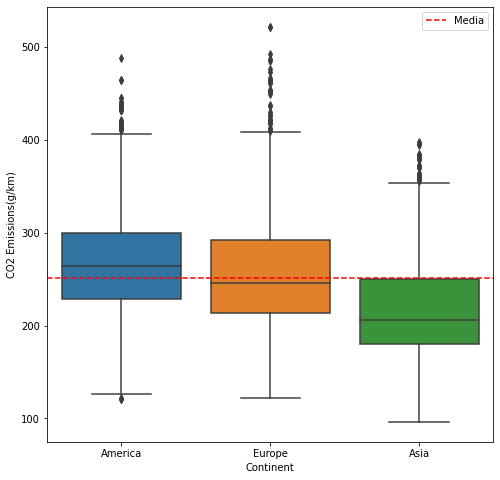

In [323]:
plt.figure(figsize=(8, 8))
sns.boxplot( x="Continent",y="CO2 Emissions(g/km)",data=data)
left, right = plt.xlim()
plt.hlines(data["CO2 Emissions(g/km)"].mean(), xmin=left, xmax=right, color='r', linestyles='--',label="Media")
plt.legend()
plt.show()

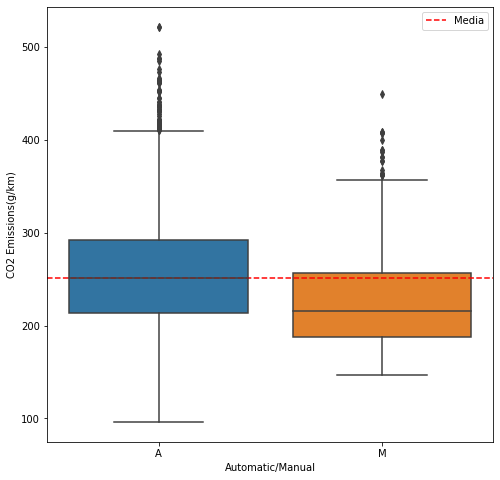

In [324]:
plt.figure(figsize=(8, 8))
sns.boxplot( x="Automatic/Manual",y="CO2 Emissions(g/km)",data=data)
left, right = plt.xlim()
plt.hlines(data["CO2 Emissions(g/km)"].mean(), xmin=left, xmax=right, color='r', linestyles='--',label="Media")
plt.legend()
plt.show()

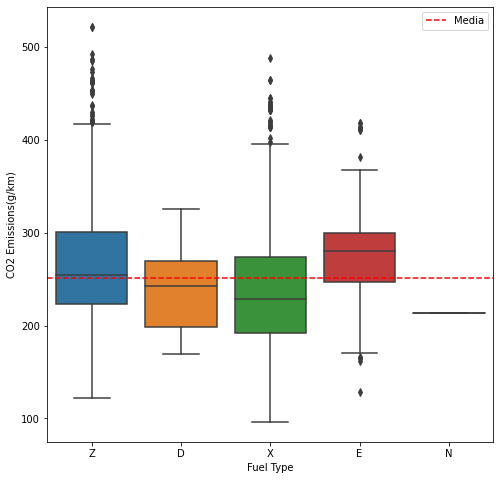

In [325]:
plt.figure(figsize=(8, 8))
sns.boxplot( x="Fuel Type",y="CO2 Emissions(g/km)",data=data)
left, right = plt.xlim()
plt.hlines(data["CO2 Emissions(g/km)"].mean(), xmin=left, xmax=right, color='r', linestyles='--',label="Media")
plt.legend()
plt.show()

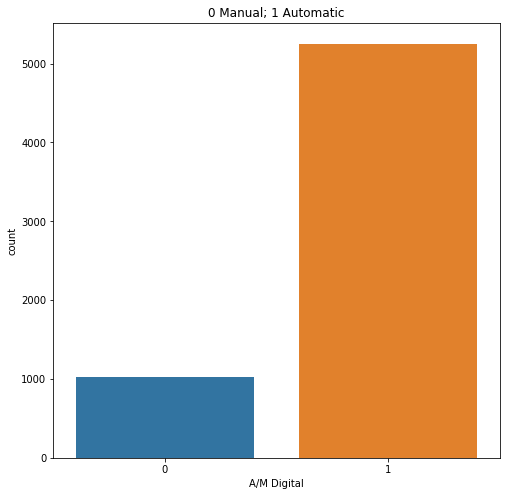

In [326]:
plt.figure(figsize=(8, 8))
sns.countplot( x="A/M Digital",data=data)
plt.title("0 Manual; 1 Automatic")
plt.show()

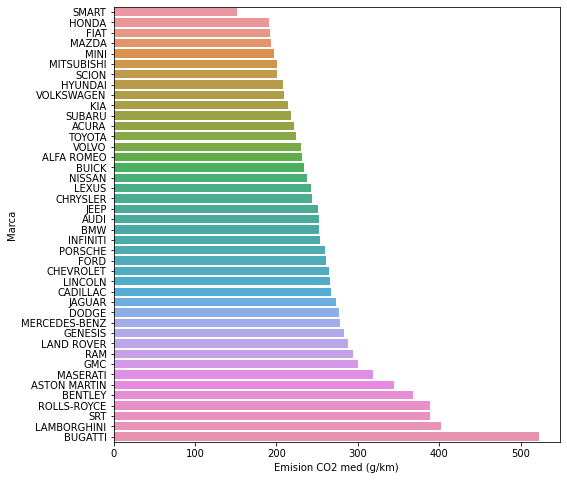

In [327]:
CO2med = CO2med.sort_values("Emision CO2 med (g/km)")
plt.figure(figsize=(8, 8))
sns.barplot( y="Marca",x="Emision CO2 med (g/km)",data=CO2med)

plt.show()

In [328]:
CO2med.head()

,Marca,Emision CO2 med (g/km)
34,SMART,152.125000
14,HONDA,191.262195
11,FIAT,192.285714
25,MAZDA,192.755906
27,MINI,196.570000


In [329]:
# Guardar datos por marca y emisión de CO2 
CO2med.to_csv("CO2med.csv",index=False)

# Ejercicio II: utilice este gran conjunto de datos históricos sobre los Juegos Olímpicos modernos, incluidos todos los Juegos desde Atenas 1896 hasta Río 2016.
 
https://raw.githubusercontent.com/mhemmg/datasets/master/sport/athlete_events.csv 

## 1. Mirando un deporte particular: remo - rowing, ver si la edad de las medallistas de oro femeninas está aumentando o disminuyendo a través de los tiempos. Realize un plot para muestrar la tendencia (si hay una)


In [330]:
# Se leen los datos
datosO = pd.read_csv("athlete_events.csv")
datosO.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [331]:
datos = datosO[datosO["Sport"]=="Rowing"]
datos = datos[datos["Sex"]=="F"]
datos = datos[datos["Medal"]=="Gold"]
datos = datos.sort_values("Year")
datos.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2577,1443,Brigitte Ahrenholz,F,23.0,178.0,85.0,East Germany,GDR,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Women's Coxed Eights,Gold
135882,68369,Helma Lehmann (Mhren-),F,23.0,183.0,75.0,East Germany,GDR,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Women's Coxed Eights,Gold
157650,79137,Karin Metze (-Ulbricht),F,19.0,180.0,82.0,East Germany,GDR,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Women's Coxed Fours,Gold
165418,83086,Irina Mller (-Weisse),F,25.0,176.0,84.0,East Germany,GDR,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Women's Coxed Eights,Gold
82359,41840,Viola Goretzki (-Landvoigt),F,19.0,182.0,77.0,East Germany,GDR,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Women's Coxed Eights,Gold


In [332]:
# medias de edad por año
años = datos["Year"].unique()
medias = []
for i in range(0,len(años)):
  pAño = datos[datos["Year"]==años[i]]
  med = pAño["Age"].mean()
  medias.append(med)


No handles with labels found to put in legend.


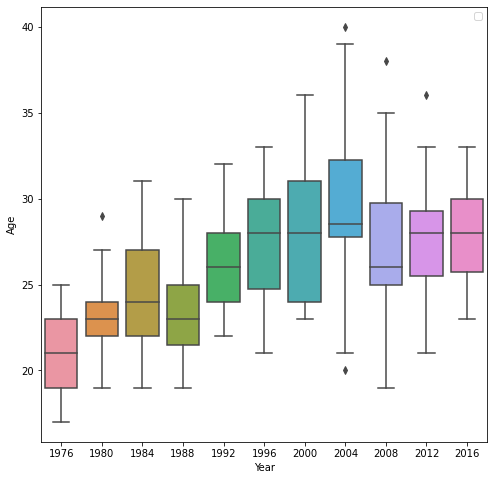

In [333]:
plt.figure(figsize=(8, 8))
sns.boxplot( x="Year",y="Age",data=datos)

plt.legend()
plt.show()


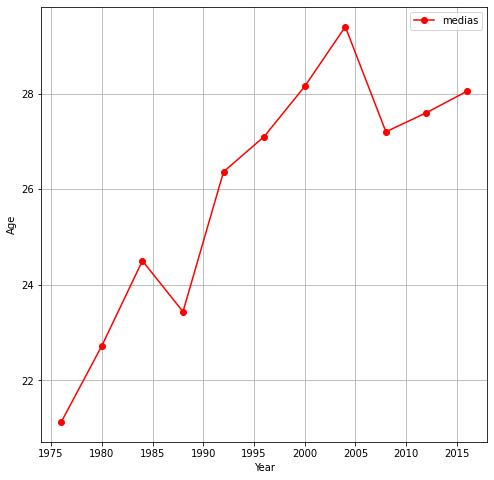

In [334]:
plt.figure(figsize=(8, 8))
plt.plot(años,medias,"r-o",label="medias")
plt.grid()
plt.legend()
plt.xlabel("Year")
plt.ylabel("Age")
plt.show()

## Dado que existen varias modalidades en el deporte del remo cada año entonces se tienen varias deportistas que ganaron el oro, dado esto recordemos que la linea que aparece en la mitad de cada uno de los boxplot de cada año corresponde a la mediana de cada año, asi que tambien se grafican las medias por año para tener las 2 graficas. 

## La conclusión es que si hubo una tendencia de las ganadoras de oro en remo a traves de los años 

## 2. Sea creativo y extrae algunas informaciones interesantes de este conjunto.

In [335]:
# Veamos los ganadores los ganadores de oro en colombia
datos = datosO[datosO["Team"]=="Colombia"]
datos = datos[datos["Medal"]=="Gold"]
datos

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
69147,35261,scar Albeyro Figueroa Mosquera,M,33.0,159.0,62.0,Colombia,COL,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Featherweight,Gold
101862,51514,Caterine Ibargn Mena,F,32.0,185.0,70.0,Colombia,COL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Triple Jump,Gold
180331,90631,Mariana Pajn Londoo,F,20.0,158.0,50.0,Colombia,COL,2012 Summer,2012,Summer,London,Cycling,Cycling Women's BMX,Gold
180332,90631,Mariana Pajn Londoo,F,24.0,158.0,50.0,Colombia,COL,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,Cycling Women's BMX,Gold
246669,123513,Mara Isabel Urrutia Ocor,F,35.0,170.0,78.0,Colombia,COL,2000 Summer,2000,Summer,Sydney,Weightlifting,Weightlifting Women's Heavyweight,Gold


In [336]:
# Veamos las personas mas jovenes y las mas viejas en ganar un oro
datos = datosO[datosO["Medal"]=="Gold"]
datos = datos.sort_values("Age")
datos.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
268602,134381,Klaus Zerta,M,13.0,165.0,48.0,Germany,GER,1960 Summer,1960,Summer,Roma,Rowing,Rowing Men's Coxed Pairs,Gold
52010,26731,Donna Elizabeth de Varona (-Pinto),F,13.0,168.0,61.0,United States,USA,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold
119277,60384,Kim Yun-Mi,F,13.0,160.0,48.0,South Korea,KOR,1994 Winter,1994,Winter,Lillehammer,Short Track Speed Skating,"Short Track Speed Skating Women's 3,000 metres...",Gold
27207,14142,Hans Bourquin,M,13.0,NaN,NaN,Switzerland,SUI,1928 Summer,1928,Summer,Amsterdam,Rowing,Rowing Men's Coxed Pairs,Gold
73581,37398,Fu Mingxia,F,13.0,160.0,48.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Diving,Diving Women's Platform,Gold
78544,39866,Marjorie Gestring (-Redlick),F,13.0,NaN,NaN,United States,USA,1936 Summer,1936,Summer,Berlin,Diving,Diving Women's Springboard,Gold
200704,100797,Aileen Muriel Riggin (-Soule),F,13.0,142.0,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Springboard,Gold
69216,35292,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
163440,82042,Sandra Anne Morgan (-Beavis),F,14.0,167.0,67.0,Australia,AUS,1956 Summer,1956,Summer,Melbourne,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold
172293,86555,Carola Nitschke (-Beraktschjan),F,14.0,172.0,62.0,East Germany,GDR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Gold


In [337]:
datos = datos.sort_values("Age",ascending=False)
datos.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
105199,53238,Charles Jacobus,M,64.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Gold
233390,117046,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold
261102,130662,"Robert W. Williams, Jr.",M,63.0,NaN,NaN,Potomac Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Gold
190952,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold
104003,52626,Isaac Lazarus Israls,M,63.0,NaN,NaN,Netherlands,NED,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",Gold


In [338]:
# Veamos el numero de diferentes deportes que hay
len(datosO["Sport"].unique())

66

In [339]:
# Y cuantos diferentes team han participado, tener en cuenta que es muchos olimpicos hay deportistas que participan bajo nombres que no son de paises
len(datosO["Team"].unique())

1184

In [340]:
# y de esos teams cuantos han ganado oro?
datos = datosO[datosO["Medal"]=="Gold"]
len( datos["Team"].unique())

242

In [341]:
# por ultimo grafiquemos los paises con mas medallas de oro
datos = datosO[datosO["Medal"]=="Gold"]
paises = datos["Team"].unique()
contador = []
for i in range(0,len(paises)):
  pais = datos[datos["Team"]==paises[i]]
  cont = pais.shape[0]
  contador.append(cont)

final = pd.DataFrame({"Pais":paises,"N. medallas oro":contador})
final.head()

,Pais,N. medallas oro
0,Denmark/Sweden,6
1,Finland,198
2,Norway,299
3,Taifun,5
4,France,455


In [342]:
final = final.sort_values("N. medallas oro",ascending=False)
graf = final.head(20)

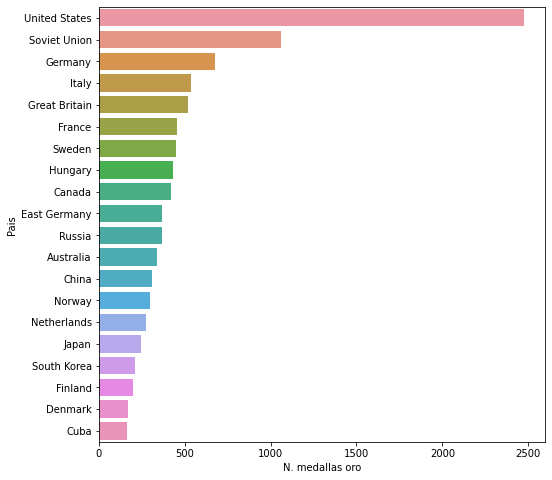

In [343]:
plt.figure(figsize=(8, 8))
sns.barplot( y="Pais",x="N. medallas oro",data=graf)

plt.show()